In [71]:
import pandas as pd
import numpy as np

In [72]:
df =pd.read_csv('/Users/mac/titanic/train.csv')
df.head()   

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [73]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [74]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [75]:
df['Age'].fillna(df['Age'].median(),inplace=True)

In [76]:
mode = df['Embarked'].mode().values[0]

In [77]:
for i ,row in df.iterrows():
    if pd.isnull(row["Embarked"]):
        df.loc[i,"Embarked"] = mode

In [78]:
df.drop(columns=['PassengerId','Cabin','Ticket'], inplace=True)

In [79]:
print(df.isnull().sum())

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [80]:
from sklearn.preprocessing import LabelEncoder

In [81]:
le = LabelEncoder()

In [82]:
df['Sex']=le.fit_transform(df["Sex"])
df['Embarked']=le.fit_transform(df['Embarked'])

In [83]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,0
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,2
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,2


In [84]:
from sklearn import preprocessing

In [85]:
enc = preprocessing.OneHotEncoder()
transformed = enc.fit_transform(df[['Sex', 'Embarked']])

print(transformed.toarray())

[[0. 1. 0. 0. 1.]
 [1. 0. 1. 0. 0.]
 [1. 0. 0. 0. 1.]
 ...
 [1. 0. 0. 0. 1.]
 [0. 1. 1. 0. 0.]
 [0. 1. 0. 1. 0.]]


In [86]:
import matplotlib.pyplot as plt
import seaborn as sns 

Text(0, 0.5, 'Count')

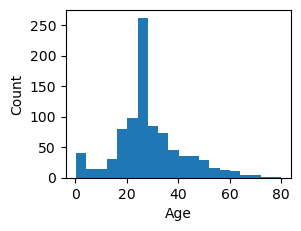

In [131]:
plt.subplot(2, 2, 1)
plt.hist(df['Age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Count')

In [89]:
# this chart show us that the majority of passengers are between 20 and 40

Text(0, 0.5, 'Count')

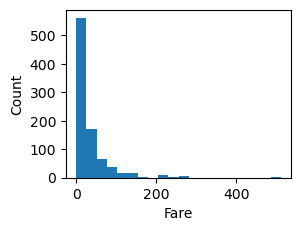

In [132]:
plt.subplot(2, 2, 2)
plt.hist(df['Fare'], bins=20)
plt.xlabel('Fare')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

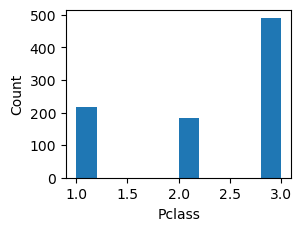

In [133]:
plt.subplot(2, 2, 3)
plt.hist(df['Pclass'])
plt.xlabel('Pclass')
plt.ylabel('Count')

In [92]:
# the majority of passengers were in the third pclass 

Text(0, 0.5, 'Count')

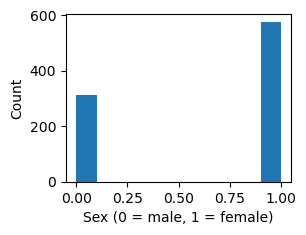

In [93]:
plt.subplot(2, 2, 4)
plt.hist(df['Sex'])
plt.xlabel('Sex (0 = male, 1 = female)')
plt.ylabel('Count')

In [94]:
# there were more male passengers than females

In [95]:
bins = [0, 18, 30, 50, 100]
df['Age_Range'] = pd.cut(df['Age'], bins)

In [96]:
labels = ['<18', '18-29', '30-49', '>=50']
df['Age_Range'] = pd.cut(df['Age'], bins, labels=labels)

In [97]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Age_Range
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,2,18-29
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,0,30-49
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,2,18-29
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,2,30-49
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,2,30-49


<AxesSubplot:xlabel='Sex', ylabel='count'>

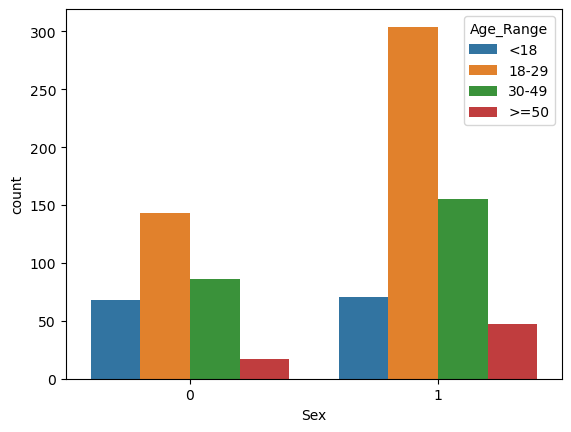

In [98]:
sns.countplot(data = df , x ='Sex', hue="Age_Range")

In [99]:
# this chart show us that the ages of both males and females were distributed across a wide range, and the majority are between 18 and 29

Text(0, 0.5, 'Survival Rate')

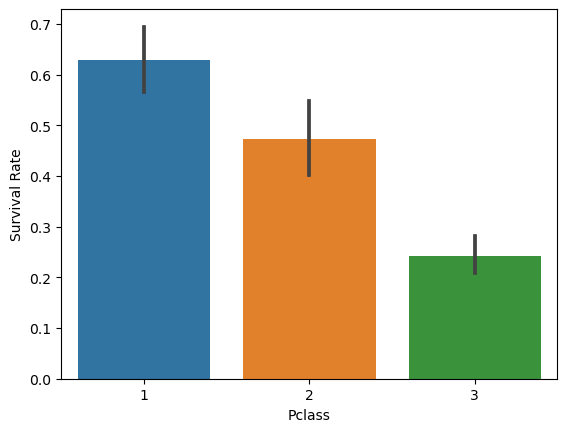

In [100]:
sns.barplot(x='Pclass', y='Survived', data= df)
plt.xlabel('Pclass')
plt.ylabel('Survival Rate')

In [101]:
# this chart shows that the majority of passengers who survived were in the third Pclass

Text(0, 0.5, 'Survival Rate')

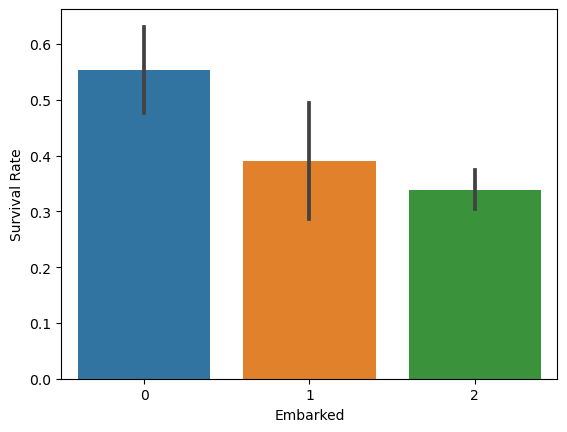

In [102]:
sns.barplot(x='Embarked', y='Survived', data=df)
plt.xlabel('Embarked')
plt.ylabel('Survival Rate')

In [103]:
# this chart shows that passengers who embarked from location C had the highest survival rate

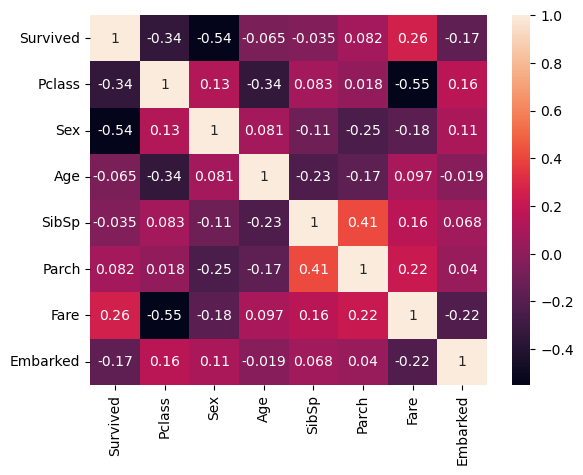

In [104]:
sns.heatmap(df.corr(),annot=True)
plt.show()

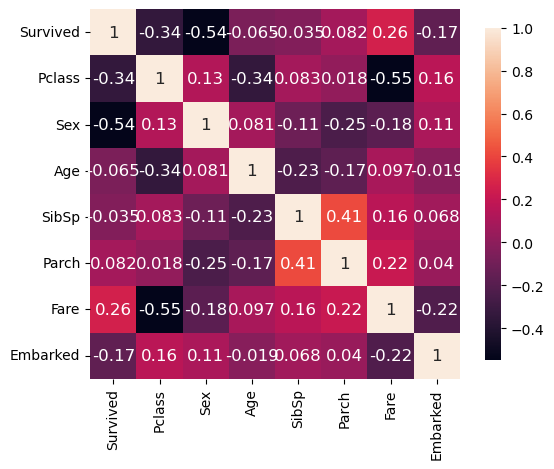

In [105]:
sns.heatmap(df.corr(),square=True,cbar_kws={ 'shrink' : .9 } ,annot=True,  annot_kws = { 'fontsize' : 12 })
plt.show()

In [106]:
title = lambda x: x.split(',')[1].split('.')[0].strip()
df['Title'] = df['Name'].apply(title)

In [107]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Age_Range,Title
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,2,18-29,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,0,30-49,Mrs
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,2,18-29,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,2,30-49,Mrs
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,2,30-49,Mr


In [109]:
Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Dr": "Officer",
    "Rev": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir": "Royalty",
    "Lady": "Royalty",
    "the Countess": "Royalty",
    "Dona": "Royalty",
    "Mme": "Miss",
    "Mlle": "Miss",
    "Miss": "Miss",
    "Ms": "Mrs",
    "Mr": "Mrs",
    "Mrs": "Mrs",
    "Master": "Master"
}

In [110]:
df['Title_Grouped'] = df['Title'].map(Title_Dictionary)

In [111]:
df.groupby('Title_Grouped')['Survived'].mean()

Title_Grouped
Master     0.575000
Miss       0.702703
Mrs        0.281493
Officer    0.277778
Royalty    0.600000
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Survived', ylabel='count'>

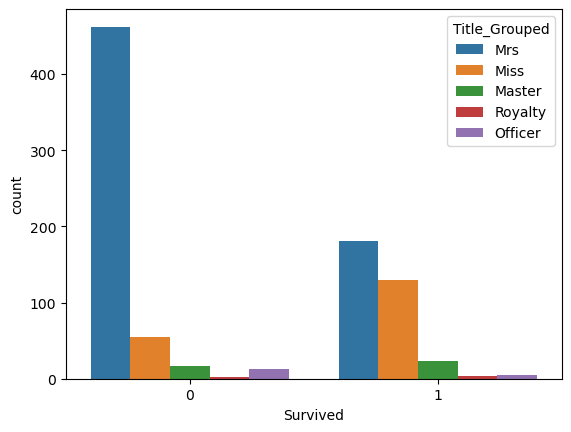

In [112]:
sns.countplot(data = df , x ='Survived', hue="Title_Grouped")

In [126]:
df['Title']=le.fit_transform(df['Title'])
df['Title_Grouped']=le.fit_transform(df['Title_Grouped'])

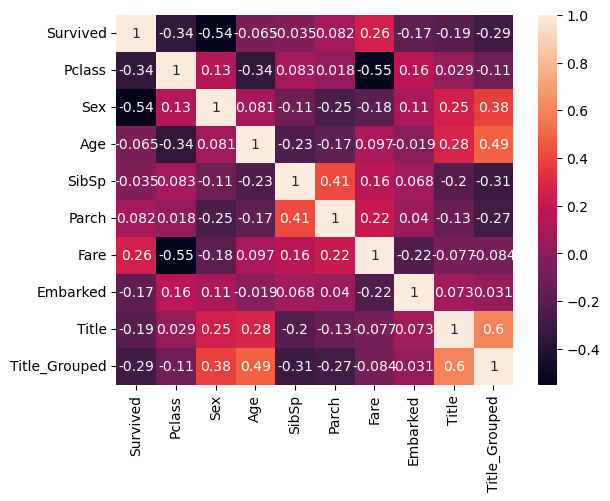

In [127]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [128]:
df['FamilySize'] = df['Parch'] + df['SibSp'] + 1


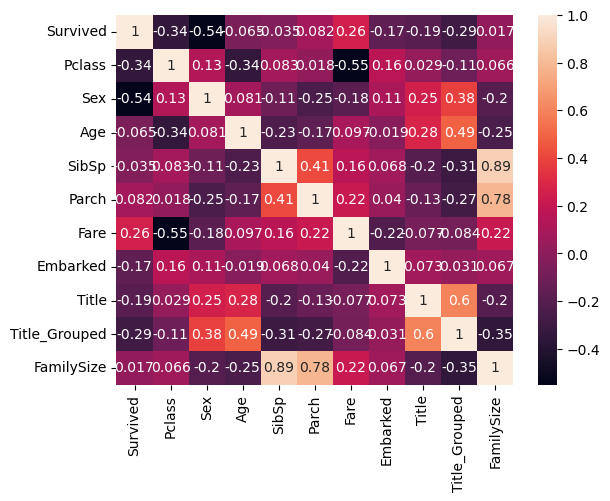

In [130]:
sns.heatmap(df.corr(),annot=True)
plt.show()